In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("all")
import re
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\amith\AppData\Roaming\nltk_data...
[

In [119]:
list_of_stopwords = nltk.corpus.stopwords.words("english")

In [120]:
df = pd.read_csv("udemy_course_data.csv")
courses = df["course_title"].values

list_of_cleaned_courses = []

for i in courses:
    tokenised_words = nltk.tokenize.word_tokenize(i)
    p = []
    q = ""
    r = []
    for j in tokenised_words:
        p.append(nltk.stem.PorterStemmer().stem(j))
    for j in p:
        if j not in list_of_stopwords:
            q += (j + " ")
    q = q.strip()
    r = re.sub(r'[^a-zA-Z0-9\s]',"",q)
    list_of_cleaned_courses.append(r)

df_cleaned = df.copy()
df_cleaned["course_title_cleaned"] = list_of_cleaned_courses

In [121]:
def tokenise_my_course(my_course_name):
    tokenised_words = nltk.tokenize.word_tokenize(my_course_name)
    p = []
    q = ""
    r = []
    for j in tokenised_words:
        p.append(nltk.stem.PorterStemmer().stem(j))
    for j in p:
        if j not in list_of_stopwords:
            q += (j + " ")
    q = q.strip()
    r = re.sub(r'[^a-zA-Z0-9\s]',"",q)
    return r

In [122]:
df_cleaned.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,course_title_cleaned
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18,ultim invest bank cours
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9,complet gst cours certif grow ca practic
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19,financi model busi analyst consult
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30,beginn pro financi analysi excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13,maxim profit trade option


In [126]:
def recommend_courses(my_course,df_cleaned):
    tokenised_my_course = tokenise_my_course(my_course)

    course_titles_cleaned = df_cleaned["course_title_cleaned"].values.tolist()
    course_titles_cleaned = [tokenised_my_course] + course_titles_cleaned

    tfidf = TfidfVectorizer()
    vect = tfidf.fit_transform(course_titles_cleaned)

    cos_sim = cosine_similarity(vect)

    cos = pd.Series(cos_sim[0])
    coz = cos.sort_values(ascending=False)
    pk = coz.index.values[1:]
    similarity_matrix_indices = pk.tolist()
    similarity_matrix_values = coz.values[1:].tolist()

    similar_movies = df_cleaned.loc[similarity_matrix_indices[0:10],"course_title"].values
    df = df_cleaned.loc[similarity_matrix_indices[0:10],:].drop("course_title_cleaned",axis=1)
    return similar_movies,df

In [127]:
similar_movies,df = recommend_courses("Ultimate Investment Banking Course",df_cleaned)
similar_movies

array(['Complete GST Course & Certification - Grow Your CA Practice',
       'The Complete Financial Analyst Course 2017',
       'Investing In Stocks With 10 Simple Rules',
       'Build an Advanced Single Page with Bootstrap & WordPress',
       'React From The Ground Up',
       'Level 1 2014 CFA® Program – Derivatives', 'Business Banking 101',
       'PHP for Beginners: How to Build an E-Commerce Store',
       'Ultimate Photoshop Training: From Beginner to Pro',
       'Code & Grow Rich:  Earn More As An Entrepreneur Or Developer'],
      dtype=object)

In [129]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
40,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,True,195,24481,2347,174,All Levels,10 hours,2016-01-21T01:38:48Z,Business Finance,4773795,2016-01-21,01:38:48Z,2016,1,21
243,480752,Investing In Stocks With 10 Simple Rules,https://www.udemy.com/value-investing-rules/,True,95,871,79,59,All Levels,2 hours,2015-06-16T21:35:07Z,Business Finance,82745,2015-06-16,21:35:07Z,2015,6,16
3480,461176,Build an Advanced Single Page with Bootstrap &...,https://www.udemy.com/single-page-design-with-...,True,95,481,75,77,Intermediate Level,6 hours,2015-04-08T16:23:36Z,Web Development,45695,2015-04-08,16:23:36Z,2015,4,8
2720,836044,React From The Ground Up,https://www.udemy.com/reactjs-from-the-ground-up/,True,150,3252,401,62,All Levels,12.5 hours,2016-05-02T21:59:07Z,Web Development,487800,2016-05-02,21:59:07Z,2016,5,2
660,239416,Level 1 2014 CFA® Program – Derivatives,https://www.udemy.com/cfa-derivatives/,True,40,225,2,17,All Levels,2.5 hours,2014-09-03T07:58:05Z,Business Finance,9000,2014-09-03,07:58:05Z,2014,9,3
420,462474,Business Banking 101,https://www.udemy.com/business-banking-101/,True,25,132,3,14,All Levels,1.5 hours,2015-04-06T18:05:26Z,Business Finance,3300,2015-04-06,18:05:26Z,2015,4,6
2808,527952,PHP for Beginners: How to Build an E-Commerce ...,https://www.udemy.com/php-for-beginners-how-to...,True,100,5117,463,138,All Levels,14.5 hours,2015-07-17T18:52:45Z,Web Development,511700,2015-07-17,18:52:45Z,2015,7,17
1216,1046722,Ultimate Photoshop Training: From Beginner to Pro,https://www.udemy.com/ultimate-photoshop-train...,True,200,5326,447,150,Beginner Level,11.5 hours,2017-01-12T16:56:22Z,Graphic Design,1065200,2017-01-12,16:56:22Z,2017,1,12
3009,481696,Code & Grow Rich: Earn More As An Entrepreneu...,https://www.udemy.com/code-grow-rich-earn-more...,True,200,7211,52,491,All Levels,57 hours,2016-02-10T01:09:19Z,Web Development,1442200,2016-02-10,01:09:19Z,2016,2,10


Text(0, 0.5, 'Number of Subjects ------>')

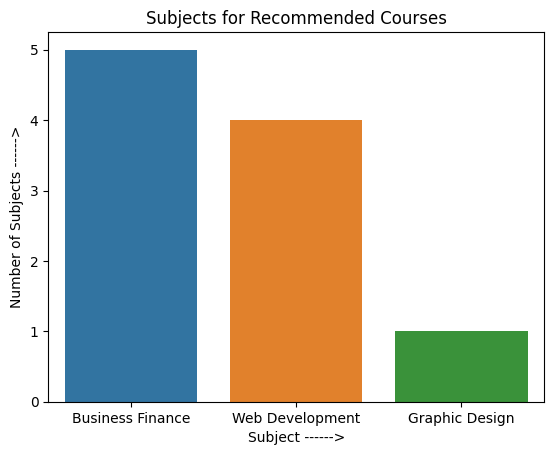

In [148]:
df_subject = df["subject"].value_counts()
current_palette = sns.color_palette() 
ax = sns.barplot(df_subject,palette=current_palette)
ax.set_title("Subjects for Recommended Courses")
ax.set_xlabel("Subject ------>")
ax.set_ylabel("Number of Subjects ------>")

Text(0, 0.5, 'Number of Courses ------>')

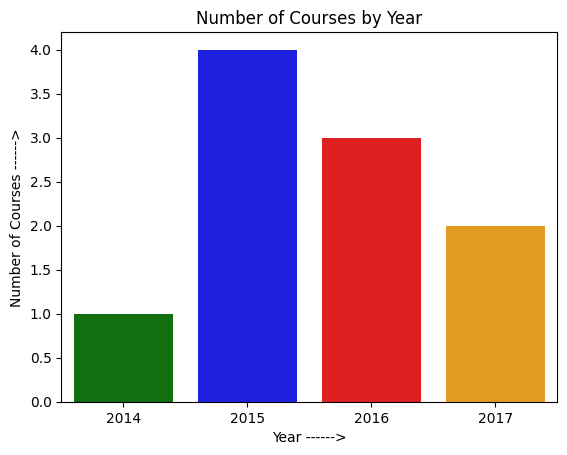

In [152]:
current_palette = ["green","blue","red","orange"]
df_year = df["year"].value_counts()
ax = sns.barplot(df_year,palette=current_palette)
ax.set_title("Number of Courses by Year")
ax.set_xlabel("Year ------>")
ax.set_ylabel("Number of Courses ------>")